<a href="https://colab.research.google.com/github/ZzzTheGamer/XAI/blob/Assignment10_XAI_in_LLMs/Perturbation_and_Counterfactual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XAI in LLMs: Perturbation and Counterfactual Analysis
* Referencces:
* Hugging Face Transformers Library
* Sentence Transformers (all-MiniLM-L6-v2)
* XAI in NLP: https://arxiv.org/abs/2012.10807

##  Setup and Imports

In [1]:
!pip install transformers sentence-transformers
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GenerationConfig
from sentence_transformers import SentenceTransformer
import torch
import numpy as np
import matplotlib.pyplot as plt

## Load Language and Similarity Models

In [2]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## Define Response Generation Function

In [3]:
def generate_response(prompt):
    # Tokenize the input prompt
    inputs = tokenizer(prompt, return_tensors='pt')
    # Generate text
    outputs = model.generate(
        **inputs,
        generation_config=GenerationConfig(
            max_new_tokens=50,      # Limit the length of the generated text
            do_sample=False,       # Disable sampling
            temperature=0.0,       # No randomness in generation
            top_k=1           # Only consider the top token for generation
        )
    )
    # Decode the generated token ids into a human-readable string
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

## Base Prompt Definition

In [4]:
base_prompt = "The knight fought the dragon with a sword. The knight won because"

## Define Perturbations and Counterfactual Prompts

In [5]:
perturbations = {
    'symbols': [
        "The wizard fought the dragon with a spell. The wizard won because",
        "The knight fought the demon with a sword. The knight won because"
    ],
    'patterns': [
        "With a sword, the dragon was fought by the knight. The knight won because",
        "The dragon was fought by the knight, who used a sword. The knight won because"
    ],
    'text': [
        "In a futuristic city, a robot battled a drone using lasers. The robot won because",
        "A chef competed against a rival in a cooking contest. The chef won because"
    ]
}

In [6]:
counterfactuals = [
    "The knight fought the dragon with a sword. The knight lost because",
    "The knight fought the dragon with a sword. The knight barely survived because"
]

## Generate Responses and Compute Similarity Scores

In [7]:
base_response = generate_response(base_prompt)
base_embedding = similarity_model.encode([base_response])

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:629: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:651: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_

In [8]:
# Store similarity scores for each perturbation type
results = {}

# Compute similarities for each perturbed prompt
for key, prompts in perturbations.items():
    similarities = []
    for prompt in prompts:
        response = generate_response(prompt)
        embedding = similarity_model.encode([response])
        similarity = np.dot(base_embedding, embedding.T).item()
        similarities.append(similarity)
    results[key] = np.mean(similarities)

# Compute similarities for counterfactual prompts
cf_similarities = []
for prompt in counterfactuals:
    response = generate_response(prompt)
    embedding = similarity_model.encode([response])
    similarity = np.dot(base_embedding, embedding.T).item()
    cf_similarities.append(similarity)

results['counterfactual'] = np.mean(cf_similarities)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


## Visualization of Perturbation Impact on Output Similarity

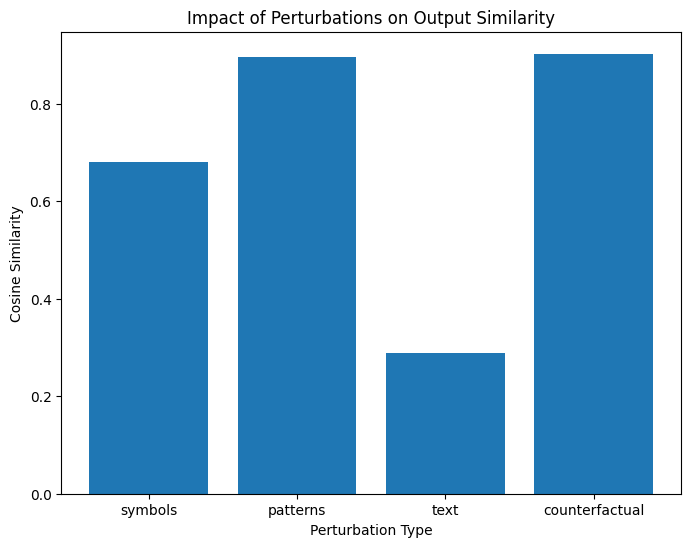

In [9]:
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values())
plt.title('Impact of Perturbations on Output Similarity')
plt.ylabel('Cosine Similarity')
plt.xlabel('Perturbation Type')
plt.show()

## Print Results Summary

In [10]:
print("Results Summary:")
for key, value in results.items():
    print(f"{key}: {value:.2f}")

Results Summary:
symbols: 0.68
patterns: 0.90
text: 0.29
counterfactual: 0.90


## View Prompts and Generated Responses

In [11]:
# View base response
print("Base Prompt and Response")
print("Prompt:", base_prompt)
print("Response:", base_response)
print("\n-----------------------------\n")

# View responses for each perturbation type
for key, prompts in perturbations.items():
    print(f"Perturbation Type: {key}")
    for prompt in prompts:
        response = generate_response(prompt)
        print("Prompt:", prompt)
        print("Response:", response)
        print("-----------------------------")
    print("\n")

# View counterfactual responses
print("Counterfactual Prompts and Responses")
for prompt in counterfactuals:
    response = generate_response(prompt)
    print("Prompt:", prompt)
    print("Response:", response)
    print("-----------------------------")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Base Prompt and Response
Prompt: The knight fought the dragon with a sword. The knight won because
Response: The knight fought the dragon with a sword. The knight won because he was the one who had the most power.

"I'm not going to let you go. I'm going to kill you."

"I'm not going to let you go. I'm going to kill you."



-----------------------------

Perturbation Type: symbols


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: The wizard fought the dragon with a spell. The wizard won because
Response: The wizard fought the dragon with a spell. The wizard won because he was a wizard.

The wizard fought the dragon with a spell. The wizard won because he was a wizard.

The wizard fought the dragon with a spell. The wizard won because he was a wizard.

The wizard fought
-----------------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: The knight fought the demon with a sword. The knight won because
Response: The knight fought the demon with a sword. The knight won because he was the one who had the most power.

"I'm not going to let you go. I'm going to kill you."

"I'm not going to let you go. I'm going to kill you."


-----------------------------


Perturbation Type: patterns


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: With a sword, the dragon was fought by the knight. The knight won because
Response: With a sword, the dragon was fought by the knight. The knight won because he was the one who had the most experience with the sword.

"I'm going to take you to the castle."

"I'm going to take you to the castle."

"I'm going to take you to the
-----------------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: The dragon was fought by the knight, who used a sword. The knight won because
Response: The dragon was fought by the knight, who used a sword. The knight won because he was able to use his sword to cut down the dragon.

"I'm sorry, but I'm not going to let you go."

"I'm sorry, but I'm not going to let you go."

"
-----------------------------


Perturbation Type: text


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: In a futuristic city, a robot battled a drone using lasers. The robot won because
Response: In a futuristic city, a robot battled a drone using lasers. The robot won because it was able to use its own energy to power its own weapons.

The robot was able to use its own energy to power its own weapons. The robot was able to use its own energy to power its own weapons. The robot was able
-----------------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: A chef competed against a rival in a cooking contest. The chef won because
Response: A chef competed against a rival in a cooking contest. The chef won because he was able to cook with a high level of skill.

The chef's skill was that of a chef.

The chef's skill was that of a chef.

The chef's skill was that of a chef.


-----------------------------


Counterfactual Prompts and Responses


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: The knight fought the dragon with a sword. The knight lost because
Response: The knight fought the dragon with a sword. The knight lost because of the dragon's power.

"I'm sorry, but I'm not going to let you go."

"I'm sorry, but I'm not going to let you go."

"I'm sorry, but I'm
-----------------------------
Prompt: The knight fought the dragon with a sword. The knight barely survived because
Response: The knight fought the dragon with a sword. The knight barely survived because of the dragon's magic.

"I'm sorry, but I'm not going to let you go."

"I'm sorry, but I'm not going to let you go."

"I'm sorry, but I'm
-----------------------------


## Results Analysis Summary

* Text Perturbation (Cosine Similarity = 0.30)
：This category shows the lowest similarity score, indicating that changing the entire context has the greatest impact on the generated output. For example, replacing a medieval scenario like "the knight fought the dragon" with a futuristic battle between a robot and a drone or a cooking contest involving a chef leads to a complete transformation in scene, characters, and narrative. As a result, the semantic similarity between the base response and the perturbed outputs is significantly reduced.

* Symbols Perturbation (Cosine Similarity = 0.68)
: Altering key symbols, such as replacing "knight" with "wizard" or "dragon" with "demon," produces a moderate impact on the output. While the specific roles are changed, the core narrative of a battle and victory remains intact. Therefore, although there are noticeable differences, the outputs retain a relatively high degree of similarity to the base response.

* Patterns Perturbation (Cosine Similarity = 0.9)
: This category focuses on structural modifications, such as shifting from active to passive voice. The main content, who fights whom with what and who wins, remains unchanged. As a result, the generated outputs are semantically very close to the original, leading to a high similarity score. This suggests that syntactic variations have minimal influence on the model’s semantic generation.

* Counterfactual Perturbation (Cosine Similarity = 0.9)
: Counterfactual prompts introduce minimal changes aimed at altering the outcome, for example, changing "the knight won" to "the knight lost" or "barely survived." Despite these changes in the conclusion, the rest of the prompt, including the setting, characters, and actions, stays nearly identical. The generated outputs reflect this maintaining a high level of similarity with the base response. The key difference is typically confined to a small portion of the text, resulting in the highest similarity score.

# Potential Improvements

1. Model Selection: Consider experimenting with more advanced models (e.g.GPT-3 or open-source LLaMA/OPT models). Larger models can provide more varied outputs, which may result in more nuanced similarity scores.

2. Diversity of Perturbations: Introduce automated or algorithmic perturbation generation to ensure more comprehensive coverage. For example, experiment with fine-grained changes, such as modifying adjectives, adverbs, or negations.

3. Similarity Metrics: Exploring other evaluation metrics (BLEU, ROUGE, etc.) may provide additional perspectives to evaluate performance.

4. Various Explainability Techniques: Incorporating saliency scores or attention analysis could further interpret model behavior.